In [349]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [350]:
df = pd.read_csv('https://raw.githubusercontent.com/sanyathisside/Predicting-Heart-Disease-using-Machine-Learning/master/heart-disease.csv')

In [351]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [352]:
X = df.drop(['target'], axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [353]:
rf = RandomForestClassifier(10, max_depth=5)

In [354]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [355]:
rf.score(X_test, y_test)

0.868421052631579

In [356]:
rf.feature_importances_

array([0.06569222, 0.04527504, 0.08278018, 0.05293974, 0.05324821,
       0.01911853, 0.01512547, 0.12904618, 0.0576089 , 0.14145095,
       0.05284633, 0.11949287, 0.16537538])

In [357]:
feature_importances_df = pd.DataFrame({'importances': rf.feature_importances_},
                                       index=X_train.columns)

In [358]:
sort_feature_importances_df = feature_importances_df.sort_values('importances', ascending=False)
sort_feature_importances_df

,importances
thal,0.165375
oldpeak,0.141451
thalach,0.129046
ca,0.119493
cp,0.082780
age,0.065692
exang,0.057609
chol,0.053248
trestbps,0.052940
slope,0.052846


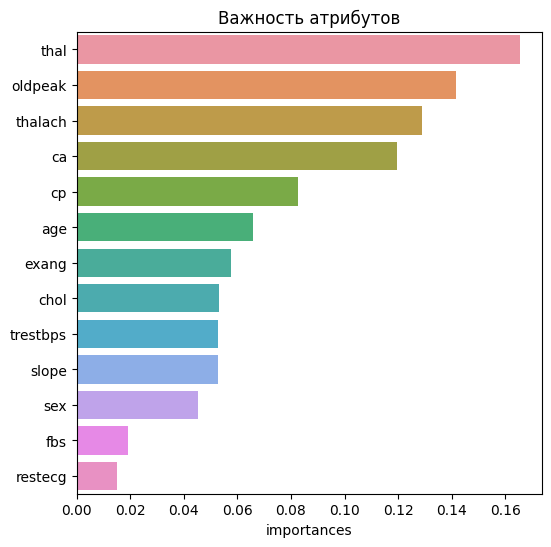

In [373]:
plt.figure(figsize=(6, 6))
sns.barplot(y=sort_feature_importances_df.index,
            x=sort_feature_importances_df['importances'])
plt.title('Важность атрибутов');

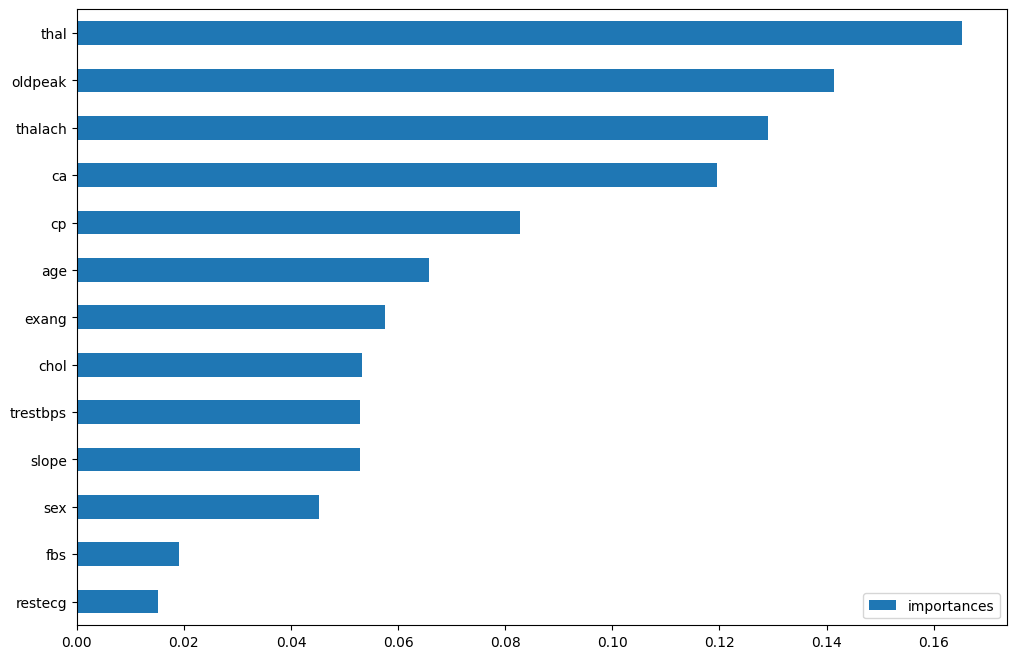

In [360]:
sort_feature_importances_df.sort_values(by='importances').plot(kind='barh', figsize=(12, 8));